##### Author:
    Diana Y. Lee, Luque Lab, SDSU
    dlee@sdsu.edu

##### Purpose:

    Creates a kernel distribution for analyzing the MCP database
    Applies the G2T model to the MCP database
    Creates the base illustrations for Figure 3 and related SI of the paper in preparation titled, [TBD]

##### Requires: 
    data\PHAGE_TABLE4.xlsx
    phage_functions.ipynb
    
    
##### Database file: 
    Figure4_update.db
    
##### Creates:
    Fig4_MCP_Kernel_Density_all.svg
    Fig4a_MCP_Kernel_Density.svg / .png
    Fig4b_Predicted_T-numbers_for_MCP.svg / .png
    Fig4c_Percent_architectures_predicted_by_T-number.svg / .png
    Fig4_tWhole.csv
    FigS2_MCP_Genome_length_histogram.svg / .png


In [1]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
np.random.seed(8)
import math
import copy
import csv

# import for the peak identification functions
from scipy.signal import find_peaks

# import the phage functions
from ipynb.fs.full.phage_functions import tNearest
from ipynb.fs.full.phage_functions import tNearestFloor
from ipynb.fs.full.phage_functions import tNearestValid
from ipynb.fs.full.phage_functions import tModel
from ipynb.fs.full.phage_functions import tNum
from ipynb.fs.full.phage_functions import tList
from ipynb.fs.full.phage_functions import tDictAll

In [2]:
# set the fontsize
font1 = 24
font2 = 20
font3 = 16

In [8]:
#create a list of possible, valid T-numbers, as well as separate t-number lists for T_h and T_t 
tps2, tps, tps_t, tps_h = tList(7)

# create T dictionaries
tdict2,tdict2rev = tDictAll(7)

# set the error margin
errMar = 0.09

In [4]:
# t-numbers that are seen in both lists are 4*t, where t equals possible T_t numbers
for i in tps_h:
    if i in tps_t:
        print(i)

4.0
12.0
16.0
28.0
36.0
48.0
52.0


In [9]:
tMod = tModel()
#print(tps)
TDNA = np.exp((np.log(tps)-tMod[2])/tMod[0])
#print(TDNA)

In [6]:
# kernel density import
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# function to build kernel density data
# https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

kde_funcname = 'Scikit-learn'

In [7]:
# import updated MCP database
phageData = pd.read_excel("data/PHAGE_TABLE4.xlsx")

# grab the complete genome size
xMCP1 = np.asarray(phageData["COMPLETE_GENOME_BP"]).reshape(-1, 1)
xMCP1 = xMCP1[~(np.isnan(xMCP1))]
xMCP1 = xMCP1/1000
xlinMCP = np.linspace(0,max(xMCP1)+10, int(max(xMCP1)+10))
n = len(xMCP1)

# check for best bandwidth
grid = GridSearchCV(KernelDensity(),
                {'bandwidth': np.linspace(1, 20, 50)},
                cv=20) # 20-fold cross-validation
grid.fit(xMCP1[:, None])
print(grid.best_params_)

# create kernel density estimates
pdfMCP = kde_sklearn(xMCP1, xlinMCP, bandwidth=grid.best_params_['bandwidth'])

{'bandwidth': 12.63265306122449}


In [8]:
# find the maximum value from all the estimates and use it to set an upper y limit
maxYlim = round(max(pdfMCP)+.005,2)

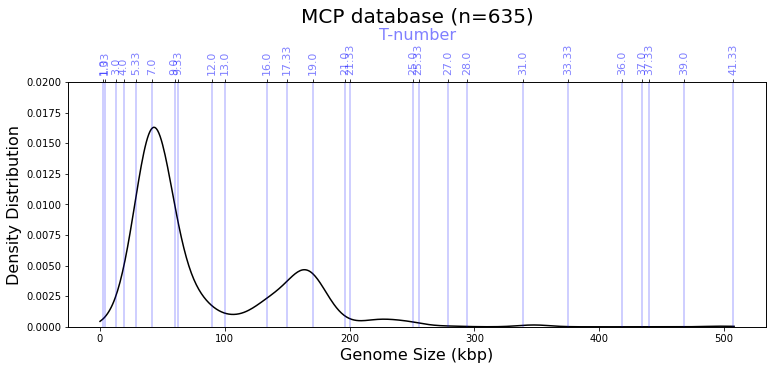

In [9]:
# MCP database kernel dist
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12.5, 4.5))
plt.plot(xlinMCP, pdfMCP, color='black', label='MCP db') 
plt.ylim((0,.02))
#plt.legend(loc="upper right")

y_range = np.linspace(0,.02,2)

tnums = tps[:26]
x_tnums = TDNA[:26]

for i in range(len(tnums)):
    x_range = [x_tnums[i],x_tnums[i]]
    plt.plot(x_range,y_range, color="blue",alpha=0.25)
    
# add another x
new_tick_locations = np.array(x_tnums)
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tnums, fontsize=11, color="blue",alpha=0.5, rotation=90)
ax2.set_xlabel("T-number", fontsize=font3, color="blue",alpha=0.5)

ax.set_title('MCP database (n=' + str(n) + ")", fontsize=font2, pad=60)
ax.set_xlabel("Genome Size (kbp)", fontsize=font3)
ax.set_ylabel("Density Distribution", fontsize=font3)
plt.savefig("results/Fig4_MCP_Kernel_Density_all1.png")
#plt.savefig("Fig4_MCP_Kernel_Density_all.svg");

(array([ 18.,  55., 194.,  98.,  37.,  13.,  22.,  11.,   2.,   8.,   3.,
          8.,  20.,  13.,  37.,  40.,  23.,   5.,   4.,   1.,   0.,   8.,
          4.,   4.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 16.687  ,  26.31326,  35.93952,  45.56578,  55.19204,  64.8183 ,
         74.44456,  84.07082,  93.69708, 103.32334, 112.9496 , 122.57586,
        132.20212, 141.82838, 151.45464, 161.0809 , 170.70716, 180.33342,
        189.95968, 199.58594, 209.2122 , 218.83846, 228.46472, 238.09098,
        247.71724, 257.3435 , 266.96976, 276.59602, 286.22228, 295.84854,
        305.4748 , 315.10106, 324.72732, 334.35358, 343.97984, 353.6061 ,
        363.23236, 372.85862, 382.48488, 392.11114, 401.7374 , 411.36366,
        420.98992, 430.61618, 440.24244, 449.8687 , 459.49496, 469.12122,
        478.74748, 488.37374, 498.     ]),
 <BarContainer object o

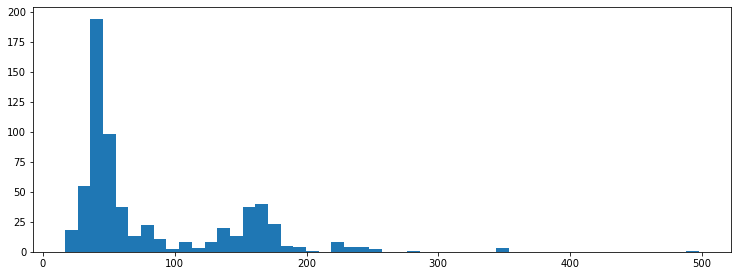

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12.5, 4.5))
plt.hist(xMCP1, bins=50)

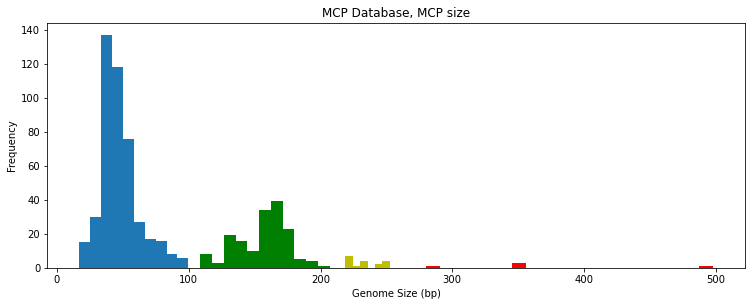

In [11]:
# break the MCPs up into groups
b1 = 100
b2 = 210
b3 = 270

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12.5, 4.5))
xMCP1a = xMCP1[xMCP1<b1]
xMCP1b = xMCP1[xMCP1>=b1]
xMCP1b = xMCP1b[xMCP1b<b2]
xMCP1c = xMCP1[xMCP1>=b2]
xMCP1c = xMCP1c[xMCP1c<b3]
xMCP1d = xMCP1[xMCP1>=b3]

plt.hist(xMCP1a, bins=10)
plt.hist(xMCP1b, bins=11, color='g')
plt.hist(xMCP1c, bins=6, color='y')
plt.hist(xMCP1d, bins=20, color='r')

plt.xlabel("Genome Size (bp)")
plt.ylabel("Frequency")
plt.title("MCP Database, MCP size")
plt.savefig("results/FigS2_MCP_Genome_length_histogram.svg")
plt.savefig("results/FigS2_MCP_Genome_length_histogram.png")
plt.show()

In [12]:
# check for best bandwidth
grid = GridSearchCV(KernelDensity(),
                {'bandwidth': np.linspace(1, 20, 50)},
                cv=5) 
grid.fit(xMCP1a[:, None])
print('xMCP1a, < %d kbps' % b1)
pct_a = len(xMCP1a)/len(xMCP1)
print('%d structures representing %.2f percent of the total number of structures' % (len(xMCP1a), pct_a))
bw_a = round(grid.best_params_["bandwidth"],2)
print('bandwidth: %.2f' % bw_a)
grid.fit(xMCP1b[:, None])
print('xMCP1b, %d-%d kbps' % (b1,b2))
pct_b = len(xMCP1b)/len(xMCP1)
print('%d structures representing %.2f percent of the total number of structures' % (len(xMCP1b), pct_b))
bw_b = round(grid.best_params_["bandwidth"],2)
print('bandwidth: %.2f' % bw_b)
grid.fit(xMCP1c[:, None])
print('xMCP1c, %d-%d kbps' % (b2,b3))
pct_c = len(xMCP1c)/len(xMCP1)
print('%d structures representing %.2f percent of the total number of structures' % (len(xMCP1c), pct_c))
bw_c = round(grid.best_params_["bandwidth"],2)
print('bandwidth: %.2f' % bw_c)
grid.fit(xMCP1d[:, None])
print('xMCP1d, > %d kbps' % b3)
pct_d = len(xMCP1d)/len(xMCP1)
print('%d structures representing %.2f percent of the total number of structures' % (len(xMCP1d), pct_d))
bw_d = round(grid.best_params_["bandwidth"],2)
print('bandwidth: %.2f' % bw_d)


xMCP1a, < 100 kbps
450 structures representing 0.71 percent of the total number of structures
bandwidth: 1.78
xMCP1b, 100-210 kbps
162 structures representing 0.26 percent of the total number of structures
bandwidth: 3.33
xMCP1c, 210-270 kbps
18 structures representing 0.03 percent of the total number of structures
bandwidth: 1.39
xMCP1d, > 270 kbps
5 structures representing 0.01 percent of the total number of structures
bandwidth: 20.00


In [13]:
# make the linspace, ensuring that our total x-space is continuous
xlinMCPa = np.linspace(int(min(xMCP1a)), int(max(xMCP1a)+(min(xMCP1b)-max(xMCP1a))/2))
xlinMCPb = np.linspace(int(max(xMCP1a)+(min(xMCP1b)-max(xMCP1a))/2), int(max(xMCP1b)+(min(xMCP1c)-max(xMCP1b))/2))
xlinMCPc = np.linspace(int(max(xMCP1b)+(min(xMCP1c)-max(xMCP1b))/2), int(max(xMCP1c)+(min(xMCP1d)-max(xMCP1c))/2))
xlinMCPd = np.linspace(int(max(xMCP1c)+(min(xMCP1d)-max(xMCP1c))/2), int(max(xMCP1d)))

# create kernel density estimates
pdfMCPa = kde_sklearn(xMCP1a, xlinMCPa, bandwidth=bw_a)
pdfMCPb = kde_sklearn(xMCP1b, xlinMCPb, bandwidth=bw_b)
pdfMCPc = kde_sklearn(xMCP1c, xlinMCPc, bandwidth=bw_c)
pdfMCPd = kde_sklearn(xMCP1d, xlinMCPd, bandwidth=bw_d)

# normalize each and multiply by percent population
normPDF_a = np.asarray([float(i)/sum(pdfMCPa) for i in pdfMCPa])*pct_a
normPDF_b = np.asarray([float(i)/sum(pdfMCPb) for i in pdfMCPb])*pct_b
normPDF_c = np.asarray([float(i)/sum(pdfMCPc) for i in pdfMCPc])*pct_c
normPDF_d = np.asarray([float(i)/sum(pdfMCPd) for i in pdfMCPd])*pct_d

# smooth the y space
normPDF_a[-1] = (normPDF_a[-1]+normPDF_b[0])/2
normPDF_b[0]= normPDF_a[-1] = (normPDF_a[-1]+normPDF_b[0])/2
normPDF_b[-1] = (normPDF_b[-1]+normPDF_c[0])/2
normPDF_c[0]= (normPDF_b[-1]+normPDF_c[0])/2
normPDF_c[-1] = (normPDF_c[-1]+normPDF_d[0])/2
normPDF_d[0]= (normPDF_c[-1]+normPDF_d[0])/2

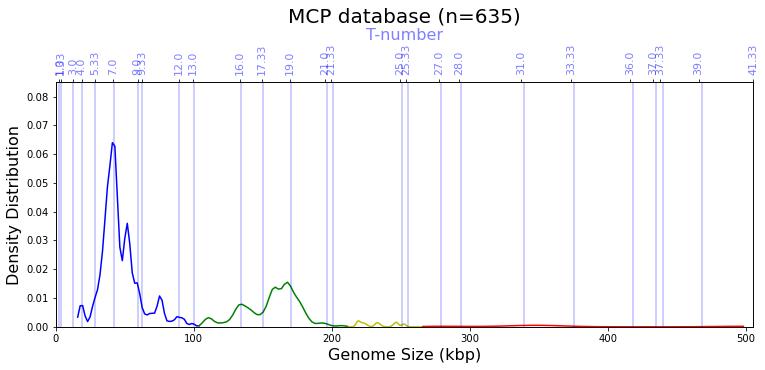

In [14]:
# MCP database kernel dist
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12.5, 4.5))
plt.plot(xlinMCPa, normPDF_a, color='b') 
plt.plot(xlinMCPb, normPDF_b, color='g') 
plt.plot(xlinMCPc, normPDF_c, color='y') 
plt.plot(xlinMCPd, normPDF_d, color='r') 
#plt.plot(xlinMCP, pdfMCP, color='black', label='MCP db') 
plt.ylim((0,.085))
plt.xlim((0,505))
#plt.legend(loc="upper right")

y_range = np.linspace(0,.085,2)

tnums = tps[:26]
x_tnums = TDNA[:26]

for i in range(len(tnums)):
    x_range = [x_tnums[i],x_tnums[i]]
    plt.plot(x_range,y_range, color="blue",alpha=0.25)
    
# add another x
new_tick_locations = np.array(x_tnums)
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tnums, fontsize=11, color="blue",alpha=0.5, rotation=90)
ax2.set_xlabel("T-number", fontsize=font3, color="blue",alpha=0.5)

ax.set_title('MCP database (n=' + str(n) + ")", fontsize=font2, pad=60)
ax.set_xlabel("Genome Size (kbp)", fontsize=font3)
ax.set_ylabel("Density Distribution", fontsize=font3)
plt.savefig("results/Fig4_MCP_Kernel_Density_all1.png")
#plt.savefig("Fig4_MCP_Kernel_Density_all.svg");

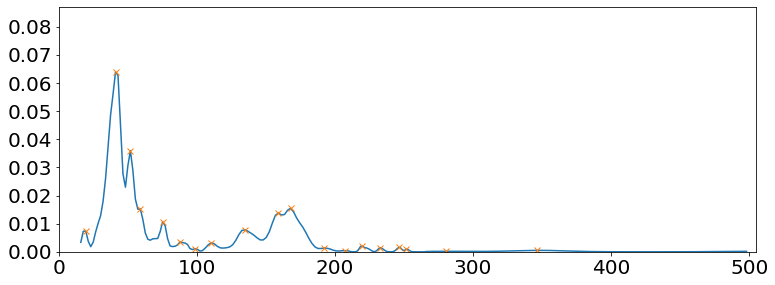

In [46]:
# create one x/y
pdfMCP2 = np.concatenate((normPDF_a,normPDF_b,normPDF_c,normPDF_d),axis=0)
xlinMCP2 = np.concatenate((xlinMCPa,xlinMCPb,xlinMCPc,xlinMCPd),axis=0)

# find peaks
peaks, _ = find_peaks(pdfMCP2, height=0)
#peaks = np.insert(peaks,3, 19) # add the shoulder near 9
#peaks = np.insert(peaks,7, 33) # add the shoulder near 28

# plot

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12.5, 4.5))

plt.plot(xlinMCP2,pdfMCP2)
plt.plot(xlinMCP2[peaks], pdfMCP2[peaks], "x")

plt.ylim((0,.087))
plt.xlim((0,505))


plt.xticks(fontsize=font2)
plt.yticks(fontsize=font2)
plt.show()

Text(0, 0.5, 'Density Distribution')

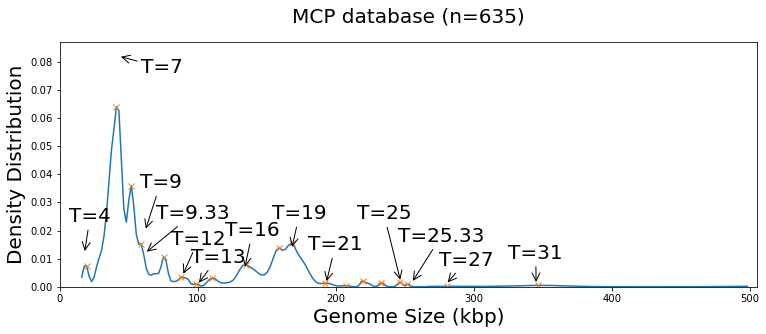

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12.5, 4.5))
plt.plot(xlinMCP2,pdfMCP2)
plt.plot(xlinMCP2[peaks], pdfMCP2[peaks], "x")


#plt.plot(np.zeros_like(pdfMCP), "--", color="gray")
ax.annotate("T=4", xy=(18,0.012), xytext=(7, 0.023),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=7", xy=(43,0.082), xytext=(59, 0.076),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=9", xy=(62,0.020), xytext=(58, 0.035),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=9.33", xy=(62,0.012), xytext=(70, 0.024),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=12", xy=(89,0.004), xytext=(81, 0.015),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=13", xy=(100,0.0009), xytext=(95, 0.0085),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=16", xy=(134,0.0065), xytext=(120, 0.018),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=19", xy=(168,0.0135), xytext=(154, 0.024),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=21", xy=(193,0.0013), xytext=(180, 0.013),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=25", xy=(247,0.0018), xytext=(215, 0.024),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=25.33", xy=(255,0.0015), xytext=(245, 0.016),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=27", xy=(280,0.001), xytext=(275, 0.0075),arrowprops=dict(arrowstyle="->"), fontsize=font2)
#ax.annotate("T=28", xy=(271,0.001), xytext=(257, 0.005),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=31", xy=(345,0.001), xytext=(325, 0.01),arrowprops=dict(arrowstyle="->"), fontsize=font2)


plt.ylim((0,.087))
plt.xlim((0,505))
ax.set_title('MCP database (n=' + str(n) + ")", fontsize=font2, pad=20)
ax.set_xlabel("Genome Size (kbp)", fontsize=font2)
plt.ylabel("Density Distribution", fontsize=font2)


In [17]:
# create a truncated t list with zero at the end
tps3 = tps[:26]
tps3 = np.insert(tps3,26,0)
tps3
tps3_DNA = []

for i in range(26):
    tps3_DNA.append(tps3[i])
    tps3_DNA.append(TDNA[i])
    tps3_DNA.append(TDNA[i]-TDNA[i]*errMar)
    tps3_DNA.append(TDNA[i]+TDNA[i]*errMar)

tps3_DNA = np.reshape(np.ravel(tps3_DNA), (26, 4));
tps3_DNA = np.asarray(tps3_DNA)

print("  T-num  ---  exact DNA  ---  low DNA  ---  high DNA")
print(tps3_DNA)

y_pos = np.arange(len(tps3))

  T-num  ---  exact DNA  ---  low DNA  ---  high DNA
[[  1.           2.73784255   2.49143672   2.98424838]
 [  1.33         4.085017     3.71736547   4.45266853]
 [  3.          12.7906495   11.63949104  13.94180795]
 [  4.          19.15152591  17.42788858  20.87516324]
 [  5.33        28.65056418  26.0720134   31.22911496]
 [  7.          41.99794576  38.21813065  45.77776088]
 [  9.          59.75534083  54.37736016  65.13332151]
 [  9.33        62.85229702  57.19559029  68.50900376]
 [ 12.          89.47207555  81.41958875  97.52456235]
 [ 13.         100.10708032  91.09744309 109.11671755]
 [ 16.         133.96714322 121.91010033 146.02418611]
 [ 17.33       149.85056252 136.36401189 163.33711314]
 [ 19.         170.49916152 155.15423698 185.84408606]
 [ 21.         196.20595214 178.54741645 213.86448783]
 [ 21.33       200.54593153 182.49679769 218.59506536]
 [ 25.         250.58871759 228.03573301 273.14170217]
 [ 25.33       255.24241409 232.27059683 278.21423136]
 [ 27.      

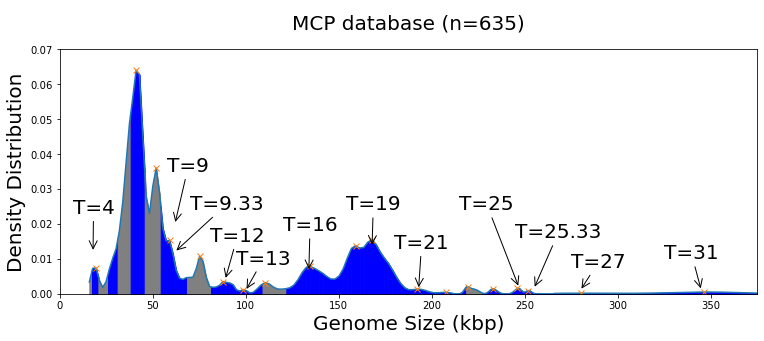

In [48]:
# create kernel density plot with shaded T/no-T
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12.5, 4.5))
plt.plot(xlinMCP2,pdfMCP2)
plt.plot(xlinMCP2[peaks], pdfMCP2[peaks], "x")

y_range=(0,.07)

#under T=4
plt.fill_between([min(xlinMCP2), tps3_DNA[3][2]], [pdfMCP2[0], 0.0069],-0.0005,color='gray')
# T=4
plt.fill_between([tps3_DNA[3][2], xlinMCP2[1]], [0.0069,pdfMCP2[1]],-0.0005,color='blue')
plt.fill_between([xlinMCP2[1], xlinMCP2[2]], [pdfMCP2[1],pdfMCP2[2]],-0.0005,color='blue')
plt.fill_between([xlinMCP2[2], tps3_DNA[3][3]], [pdfMCP2[2],0.0048],-0.0005,color='blue')
#between T=4 and t=5.33
plt.fill_between([tps3_DNA[3][3], xlinMCP2[3]], [0.0048, pdfMCP2[3]],-0.0005,color='gray')
for i in range(3,5):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='gray')
plt.fill_between([xlinMCP2[5],tps3_DNA[4][2]], [pdfMCP2[5], .0058],-0.0005,color='gray')
# T=5.33
plt.fill_between([tps3_DNA[4][2], xlinMCP2[6]], [.0058,pdfMCP2[6]],-0.0005,color='blue')
for i in range(6,8):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='blue')
plt.fill_between([xlinMCP2[8], tps3_DNA[4][3]], [pdfMCP2[8],.0155],-0.0005,color='blue')
#betwen T=5.33 and T=7
plt.fill_between([tps3_DNA[4][3],xlinMCP2[9]], [.0155,pdfMCP2[9]],-0.0005,color='gray')
for i in range(9,12):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='gray')
plt.fill_between([xlinMCP2[12],tps3_DNA[5][2]], [pdfMCP2[12],.0515],-0.0005,color='gray')
# T=7
plt.fill_between([tps3_DNA[5][2],xlinMCP2[13]], [.0515,pdfMCP2[13]],-0.0005,color='blue')
for i in range(13,16):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='blue')
plt.fill_between([xlinMCP2[16], tps3_DNA[5][3]], [pdfMCP2[16],.035],-0.0005,color='blue')
#between T=7 and T=9
plt.fill_between([tps3_DNA[5][3],xlinMCP2[17]], [.035,pdfMCP2[17]],-0.0005,color='gray')
for i in range(17,21):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='gray')
plt.fill_between([xlinMCP2[21],tps3_DNA[6][2]], [pdfMCP2[21],.025],-0.0005,color='gray')
# T=9 and T=9.33
plt.fill_between([tps3_DNA[6][2],xlinMCP2[22]], [.025,pdfMCP2[22]],-0.0005,color='blue')
for i in range(22,29):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='blue')
plt.fill_between([xlinMCP2[29], tps3_DNA[7][3]], [pdfMCP2[29],0.0046],-0.0005,color='blue')
#between T=9.33 and T=12
plt.fill_between([tps3_DNA[7][3],xlinMCP2[30]], [0.0046,pdfMCP2[30]],-0.0005,color='gray')
for i in range(30,36):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='gray')
plt.fill_between([xlinMCP2[36],tps3_DNA[8][2]], [pdfMCP2[36],0.002],-0.0005,color='gray')
# T=12 and T=13
plt.fill_between([tps3_DNA[8][2],xlinMCP2[37]], [0.002,pdfMCP2[37]],-0.0005,color='blue')
for i in range(37,52):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='blue')
plt.fill_between([xlinMCP2[52], tps3_DNA[9][3]], [pdfMCP2[52],.0028],-0.0005,color='blue')
#between T=13 and T=16
plt.fill_between([tps3_DNA[9][3],xlinMCP2[53]], [.0028,pdfMCP2[53]],-0.0005,color='gray')
for i in range(53,58):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='gray')
plt.fill_between([xlinMCP2[58],tps3_DNA[10][2]], [pdfMCP2[58],.0015],-0.0005,color='gray')
# T=16, 17.33, 19, 21, 21.33
plt.fill_between([tps3_DNA[10][2],xlinMCP2[59]], [.0015,pdfMCP2[59]],-0.0005,color='blue')
for i in range(59,106):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='blue')
#between T=21.33 and T=25
for i in range(106,114):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='gray')
plt.fill_between([xlinMCP2[114],tps3_DNA[15][2]], [pdfMCP2[114],.00012],-0.0005,color='gray')
#T=25, 25.33, 27, 28, 31, 33.33, 36, 37, 37.33, 39, 41.33
plt.fill_between([tps3_DNA[15][2],xlinMCP2[115]], [.00012,pdfMCP2[115]],-0.0005,color='blue')
for i in range(115,(len(pdfMCP2)-1)):
    plt.fill_between([xlinMCP2[i],xlinMCP2[i+1]], [pdfMCP2[i],pdfMCP2[i+1]],-0.0005,color='blue')

#plt.plot(np.zeros_like(pdfMCP), "--", color="gray")
ax.annotate("T=4", xy=(18,0.012), xytext=(7, 0.023),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=7", xy=(43,0.082), xytext=(59, 0.076),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=9", xy=(62,0.020), xytext=(58, 0.035),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=9.33", xy=(62,0.012), xytext=(70, 0.024),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=12", xy=(89,0.004), xytext=(81, 0.015),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=13", xy=(100,0.0009), xytext=(95, 0.0085),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=16", xy=(134,0.0065), xytext=(120, 0.018),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=19", xy=(168,0.0135), xytext=(154, 0.024),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=21", xy=(193,0.0013), xytext=(180, 0.013),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=25", xy=(247,0.0018), xytext=(215, 0.024),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=25.33", xy=(255,0.0015), xytext=(245, 0.016),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=27", xy=(280,0.001), xytext=(275, 0.0075),arrowprops=dict(arrowstyle="->"), fontsize=font2)
#ax.annotate("T=28", xy=(271,0.001), xytext=(257, 0.005),arrowprops=dict(arrowstyle="->"), fontsize=font2)
ax.annotate("T=31", xy=(345,0.001), xytext=(325, 0.01),arrowprops=dict(arrowstyle="->"), fontsize=font2)


plt.ylim(y_range)
plt.xlim((0,375))
ax.set_title('MCP database (n=' + str(n) + ")", fontsize=font2, pad=20)
ax.set_xlabel("Genome Size (kbp)", fontsize=font2)
plt.ylabel("Density Distribution", fontsize=font2)
plt.savefig("results/Fig4a_MCP_Kernel_Density.png")
plt.savefig("results/Fig4a_MCP_Kernel_Density.svg");
plt.show()

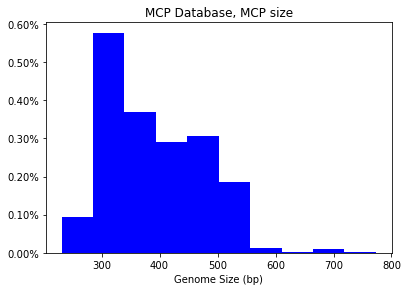

In [19]:
# grab the MCP protein length only
xMCPOnly1 = np.asarray(phageData["PROTEIN_BP"]).reshape(-1, 1)
xMCPOnly1 = xMCPOnly1[~(np.isnan(xMCPOnly1))]
xlinMCPOnly = np.linspace(min(xMCPOnly1),max(xMCPOnly1), 1000)

# create kernel density estimate
pdfMCPOnly = kde_sklearn(xMCPOnly1, xlinMCPOnly, bandwidth=20)

# plot a histogram for the MCP protein length
fig = plt.figure()
fig.figsize=(15,15)
ax = fig.add_axes([0, 0, .8, 0.8])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2%}'))
plt.hist(xMCPOnly1, density=True, color='blue')
plt.xlabel("Genome Size (bp)")
plt.title("MCP Database, MCP size")
plt.show()

In [20]:
# change any necessary column names using this command, with the arguments formatted as {"original_column_name" : "New_name"}
phageData = phageData.rename(columns={"COMPLETE_GENOME_BP": 'genome_length',"PROTEIN_BP": 'MCP_len',"ID": 'Virus_ID','TRANSLATION':'MCP_Sequence'})

In [21]:
# calculate T numbers 
ny = phageData.shape[0]
Y_T = []

for i in range(ny):
    Y_T.append(phageData.iloc[i]["Virus_ID"])
    Y_T.append(round(tNum(phageData.iloc[i]["genome_length"]/1000,0),4))
    Y_T.append(tNum(phageData.iloc[i]["genome_length"]/1000,1))
    Y_T.append(tNum(phageData.iloc[i]["genome_length"]/1000,2,errMar))
    Y_T.append(tdict2[tNum(phageData.iloc[i]["genome_length"]/1000,2,errMar)])
    
Y = np.asarray(Y_T)
Y = np.reshape(np.ravel(Y), (ny, 5));
Y = np.asarray(Y)

df_T = pd.DataFrame(Y)
df_T = df_T.rename(columns={0: 'Virus_ID', 1: 'T_raw', 2: 'T_nearest', 3: 'T_nearest_errMar', 4: 'T_nearest_errMar_code'})

df_T["T_raw"] = df_T["T_raw"].astype('float64')
df_T["T_nearest"] = df_T["T_nearest"].astype('float64')
df_T["T_nearest_errMar"] = df_T["T_nearest_errMar"].astype('float64')
df_T["T_nearest_errMar_code"] = df_T["T_nearest_errMar_code"].astype('int64')

# add T predictions to the phage data
currentDataset = phageData.merge(df_T, how='left', on='Virus_ID')
currentDataset[0:5]

,Virus_ID,GBK_ID,CDS,DEFINITION,HR data,HR_T,LOCUS_COMPLETE_GENOME,genome_length,ORGANISM,NCBI_GENPEPT_PROTEIN_ID,PROTEIN_PRODUCT,GENE_LOCUS,MCP_len,MCP_Sequence,T_raw,T_nearest,T_nearest_errMar,T_nearest_errMar_code
0,0,1262521.3,bp:11683..12636,"Leuconostoc phage phiLNTR3, complete genome.",NaN,NaN,NC_024378_1_28015,28015,"Viruses; dsDNA viruses, no RNA stage; Caudovir...",YP_009044222.1,putative major capsid protein,HL53_gp15,317,MGIEFLSTSKAVELYAKLALETQGNTETFSRKWKDIVSERSEQAIT...,5.2455,5.33,5.33,4
1,1,1273740.3,bp:9604..10494,"Bacillus phage Curly, complete genome.",NaN,NaN,NC_020479_1_49425,49425,"Viruses; dsDNA viruses, no RNA stage; Caudovir...",YP_007517560.1,major capsid protein,CURLY_16,296,MADIVLGQHPLLKKVFLDRRIKDFTASGFVADQLFTNISVDALAIK...,7.8613,7.00,0.00,47
2,2,1282994.3,bp:13216..14253,"Burkholderia phage ST79, complete genome.",NaN,NaN,NC_021343_1_35430,35430,"Viruses; dsDNA viruses, no RNA stage; Caudovir...",YP_008060494.1,major capsid protein,M190_gp20,345,MNPITRRALTRYMDNIAKLNGVASVAEKFAVAPSVQQTLEKRIQES...,6.2010,7.00,0.00,47
3,3,633135.2,bp:4469..5662,Streptococcus phage Abc2,NaN,NaN,NC_013645_1_34882,34882,"Viruses; dsDNA viruses, no RNA stage; Caudovir...",YP_003347415.1,Phage major capsid protein # ACLAME 20,SP-Abc2_gp06,397,MKTSNELHDLWVAQGDKVENLNEKLNVAMLDDSVTAEELQKIKNER...,6.1325,5.33,0.00,47
4,5,1168563.3,bp:5642..6655,"Stenotrophomonas phage Smp131, complete genome.",NaN,NaN,NC_023588_1_33525,33525,"Viruses; dsDNA viruses, no RNA stage; Caudovir...",YP_009008364.1,phage major capsid protein precursor,CH36_gp09,337,MRTKTRRLFEGYTQQVATLNNVSGVANTFSVEPTVQQSLEARMQES...,5.9615,5.33,0.00,47


In [22]:
from collections import Counter

#words = tNearest1
words = currentDataset["T_nearest_errMar"]

print(Counter(words).keys()) # equals to list(set(words))
print(Counter(words).values()) # counts the elements' frequency

dict_keys([5.33, 0.0, 7.0, 17.33, 19.0, 9.0, 12.0, 16.0, 9.33, 4.0, 25.0, 21.0, 31.0, 13.0, 21.33, 27.0, 41.33])
dict_values([27, 116, 201, 46, 70, 60, 15, 32, 15, 14, 11, 5, 3, 10, 8, 1, 1])


In [23]:
noTnum = Counter(words)[0]/len(xMCP1)
print( "{:.1%}".format(noTnum) )

18.3%


In [24]:
Counter(words)

Counter({5.33: 27,
         0.0: 116,
         7.0: 201,
         17.33: 46,
         19.0: 70,
         9.0: 60,
         12.0: 15,
         16.0: 32,
         9.33: 15,
         4.0: 14,
         25.0: 11,
         21.0: 5,
         31.0: 3,
         13.0: 10,
         21.33: 8,
         27.0: 1,
         41.33: 1})

In [25]:
# shorten the possible T and TDNA arrays to fit the MCP data
#TDNA = np.asarray([i for i in TDNA if i<=np.max(xMCP1)])
TDNA= TDNA[:26]
tps = tps[:26]
tps2 = tps2[:27]

tps3 = []
for i in tps:
    tps3.append(i)
tps3.append("No T")
tps3 = np.asarray(tps3)

In [81]:
len(peaks)

19

In [27]:
# count how many phages in the MCP database have more than one T-number within the error
tWhole = []
MCPtcount = np.zeros(currentDataset.shape[0])

tps_h1 = np.asarray([i for i in tps_h if (i in tps_t)])

for k in range(currentDataset.shape[0]):
    tWhole.append(int(currentDataset.iloc[k]["Virus_ID"]))
    tWhole.append(currentDataset.iloc[k]["genome_length"]/1000)
    tWhole.append(currentDataset.iloc[k]["T_raw"])   
    tWhole.append(currentDataset.iloc[k]["T_nearest_errMar"])
    for j in tps: 
        if (currentDataset.iloc[k]["T_raw"] < (j + j*errMar) and currentDataset.iloc[k]["T_raw"] > (j - j*errMar)):
            MCPtcount[k] = MCPtcount[k] + 1
            if j in tps_h1:
                MCPtcount[k] = MCPtcount[k] + 1
    tWhole.append(MCPtcount[k])

tWhole=np.asarray(tWhole).reshape(-1,5)    
print("IX -- Genome size -- tRaw -- tNearestValid -- Count of T")
print(tWhole)
# assign a variable to the max T-count
maxTCount = int(np.max(MCPtcount))
print("max count = ", maxTCount) 

pd.DataFrame(tWhole).to_csv(r'results/Fig4_tWhole.csv', index=False)


IX -- Genome size -- tRaw -- tNearestValid -- Count of T
[[  0.      28.015    5.2455   5.33     1.    ]
 [  1.      49.425    7.8613   0.       0.    ]
 [  2.      35.43     6.201    0.       0.    ]
 ...
 [718.     219.      22.711   21.33     2.    ]
 [720.     252.      25.1003  25.       3.    ]
 [723.     498.      40.7856  41.33     2.    ]]
max count =  5


In [28]:
tpivC= Counter()
for T in tWhole[:,3]:
    tpivC[T] += 1
tpivC

Counter({5.33: 27,
         0.0: 116,
         7.0: 201,
         17.33: 46,
         19.0: 70,
         9.0: 60,
         12.0: 15,
         16.0: 32,
         9.33: 15,
         4.0: 14,
         25.0: 11,
         21.0: 5,
         31.0: 3,
         13.0: 10,
         21.33: 8,
         27.0: 1,
         41.33: 1})

In [29]:
# make an array that has a row for each T-number and a column for the number of hits, total and percentage for each
tPivot = np.zeros((len(tps2),(maxTCount*2+2)))

# populate column 1 with T-numbers
for i in range(tPivot.shape[0]):
    tPivot[i][0]=tps2[i]

# for each possible count
for k in range(maxTCount+1):
    # for each possible T
    for j in range(tPivot.shape[0]):
        # for each phage in the database
        for i in range(tWhole.shape[0]):
            # if the predicted T-number matches the T-number on the pivot table
            # and the count of possible T-numbers matches the column of possible predictions, increase the counter
            if tWhole[i,3]==tPivot[j,0] and tWhole[i,4]==k:
                tPivot[j,k+1]=tPivot[j,k+1]+1
# add 0 and 1, since those are both considered 1 prediction
tPivot[:,1] = tPivot[:,1]+tPivot[:,2]

#scoot the remaining predictions over
for i in range(maxTCount+1):
    tPivot[:,i+2] = tPivot[:,i+3]

# create the summation column 
tPivot[:,maxTCount+1]=0
for i in range(maxTCount):
    tPivot[:,maxTCount+1]=tPivot[:,maxTCount+1]+tPivot[:,i+1]

# calculate the percentages
for i in range(tPivot.shape[0]):
    if tPivot[i,maxTCount+1] !=0:
        for k in range(maxTCount):
            tPivot[i,maxTCount+k+2] = tPivot[i,k+1]/tPivot[i,maxTCount+1]
            
print("T-Number -- 1 pred -- 2 pred -- 3 pred -- 4 pred -- 5 pred -- total -- % 1 -- % 2 -- % 3 -- % 4 -- % 5 ")
print(tPivot)


T-Number -- 1 pred -- 2 pred -- 3 pred -- 4 pred -- 5 pred -- total -- % 1 -- % 2 -- % 3 -- % 4 -- % 5 
[[0.00000000e+00 1.16000000e+02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.16000000e+02 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.33000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.00000000e+00 0.00000000e+00 1.40000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.40000000e+01 0.00000000e+00
  1.00000000e+00 0.00000

In [30]:
# sanity check that they all add to 1
for i in (range(tPivot.shape[0])):
    print(np.sum(tPivot[i,maxTCount+2:-1]))

1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0


In [31]:
# now disambiguate the data per count
T1 = []
T2 = []
T3 = []
T4 = []
T5 = []
pred1= []
pred2= []
pred3= []
pred4= []
pred5= []


for k in range(tWhole.shape[0]):
    
    if (tWhole[k][4]==1 or tWhole[k][4]==0):
        pred1.append(tWhole[k][1])
        T1.append(tWhole[k][3])
    if tWhole[k][4]==2:
        pred2.append(tWhole[k][1])
        T2.append(tWhole[k][3])
    if tWhole[k][4]==3:
        pred3.append(tWhole[k][1])
        T3.append(tWhole[k][3])
    if tWhole[k][4]==4:
        pred4.append(tWhole[k][1])
        T4.append(tWhole[k][3])
    if tWhole[k][4]==5:
        pred5.append(tWhole[k][1])
        T5.append(tWhole[k][3])
        
plotdata_e1 = [pred1,pred2,pred3,pred4,pred5]

In [32]:
len(T1)+len(T2)+len(T3)+len(T4)+len(T5)

635

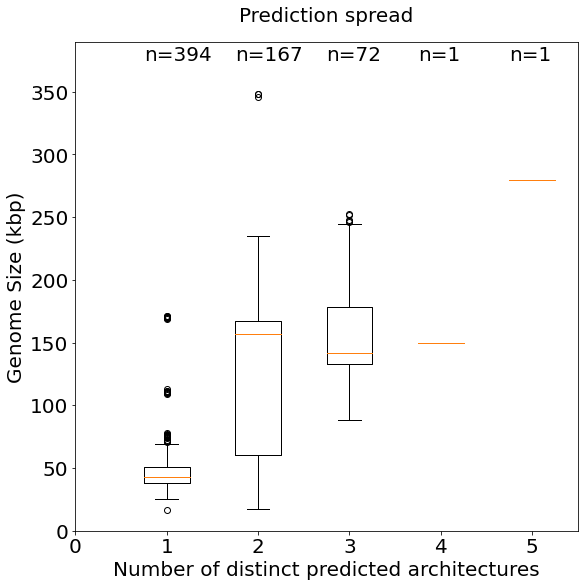

In [33]:
# box plot for evalue=1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))
plt.boxplot(plotdata_e1)
plt.xlabel("Number of distinct predicted architectures", fontsize=font2) 
plt.ylabel("Genome Size (kbp)", fontsize=font2)
plt.title("Prediction spread", fontsize=font2, pad=20)
plt.ylim(0,390)
plt.xticks(np.arange(6), ('0','1','2','3','4','5'), fontsize=font2)
plt.yticks(fontsize=font2)

allplotdatan = 0
plotdatan = []
for i in range(len(plotdata_e1)):
    DNAfb = "n=" + str(len(plotdata_e1[i]))
    plotdatan.append(DNAfb)
    allplotdatan = allplotdatan+len(plotdata_e1[i])
    plt.text(i+1-.25, 375, DNAfb, {'fontsize': font2})
  

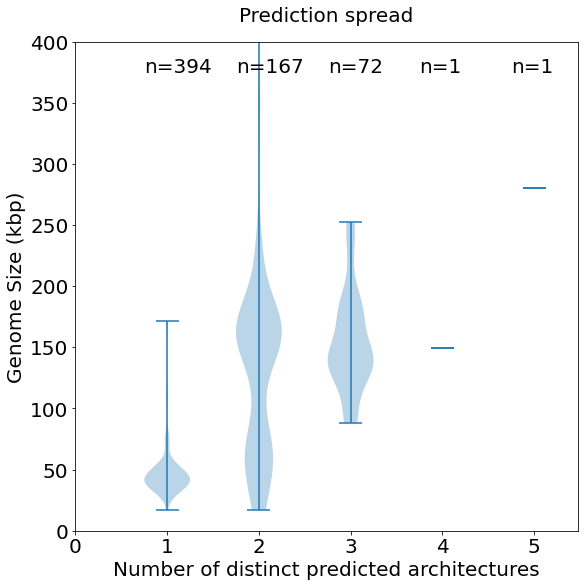

In [34]:
# box plot for evalue=1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))
plt.violinplot(plotdata_e1)
plt.xlabel("Number of distinct predicted architectures", fontsize=font2) 
plt.ylabel("Genome Size (kbp)", fontsize=font2)
plt.title("Prediction spread", fontsize=font2, pad=20)
plt.ylim(0,400)
plt.xticks(np.arange(6), ('0','1','2','3','4','5'), fontsize=font2)
plt.yticks(fontsize=font2)

allplotdatan = 0
plotdatan = []
for i in range(len(plotdata_e1)):
    DNAfb = "n=" + str(len(plotdata_e1[i]))
    plotdatan.append(DNAfb)
    allplotdatan = allplotdatan+len(plotdata_e1[i])
    plt.text(i+1-.25, 375, DNAfb, {'fontsize': font2})
    

In [35]:
[383/n, 162/n, 70/n, 1/n, 1/n]

[0.6031496062992125,
 0.2551181102362205,
 0.11023622047244094,
 0.0015748031496062992,
 0.0015748031496062992]

In [36]:
one_pred = tPivot[:,7]
two_pred = tPivot[:,8]
three_pred = tPivot[:,9]
four_pred = tPivot[:,10]
five_pred = tPivot[:,11]


pred11 = []
for i in (one_pred[1:]):
    pred11.append(i)
pred11.append(one_pred[0])
pred11 = np.asarray(pred11)

pred21 = []
for i in (two_pred[1:]):
    pred21.append(i)
pred21.append(two_pred[0])
pred21 = np.asarray(pred21)

pred31 = []
for i in (three_pred[1:]):
    pred31.append(i)
pred31.append(three_pred[0])
pred31 = np.asarray(pred31)

pred41 = []
for i in (four_pred[1:]):
    pred41.append(i)
pred41.append(four_pred[0])
pred41 = np.asarray(pred41)

pred51 = []
for i in (five_pred[1:]):
    pred51.append(i)
pred51.append(five_pred[0])
pred51 = np.asarray(pred51)

meanspace1 = pred11 + pred21
meanspace2 = meanspace1 + pred31
meanspace3 = meanspace2 + pred41
meanspace4 = meanspace3 + pred51

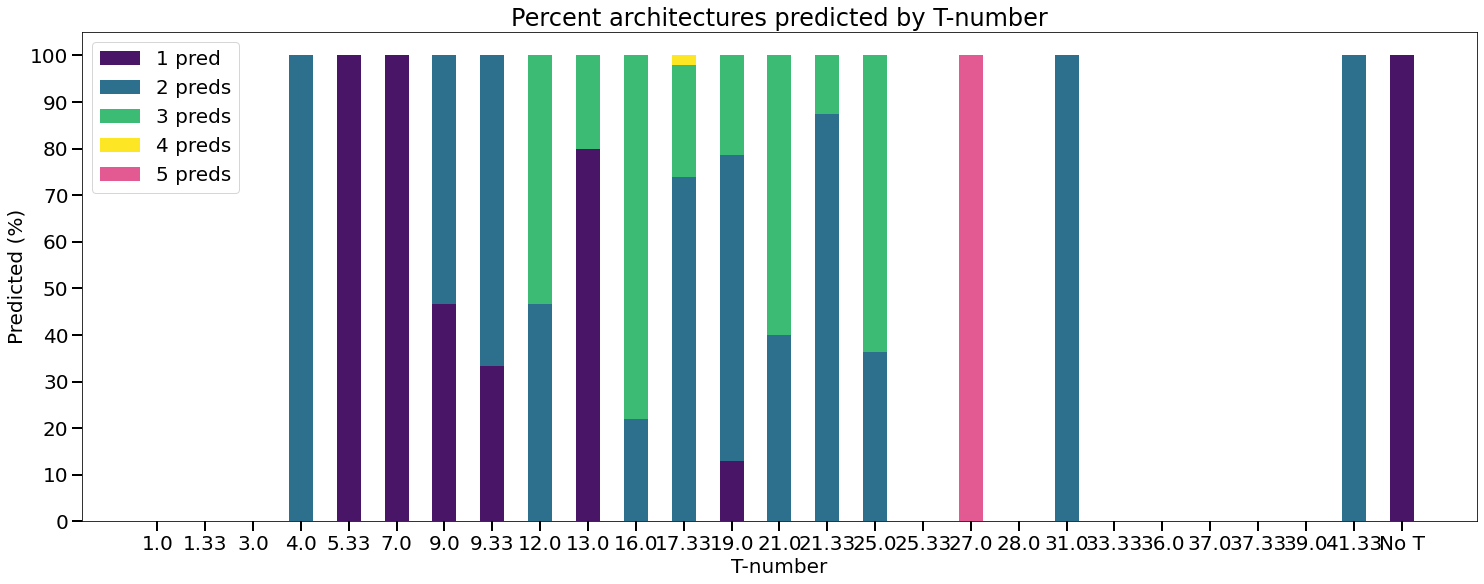

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,9))


ind = np.arange(tPivot.shape[0])    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, pred11, width, color='#481567ff', label='1 pred')
p2 = plt.bar(ind, pred21, width, color='#2d708eff', bottom=pred11, label='2 preds')
p3 = plt.bar(ind, pred31, width, color='#3cbb75ff', bottom=meanspace1, label='3 preds')
p4 = plt.bar(ind, pred41, width, color='#fde725ff', bottom=meanspace2, label='4 preds')
p5 = plt.bar(ind, pred51, width, color='#e35992ff', bottom=meanspace3, label='5 preds')

y_ind = np.arange(0, 1.1, .1)
y_tc = []
for i in y_ind:
    y_tc.append(int(i*100))
y_tc

plt.ylabel('Predicted (%)',fontsize=font2)
plt.xlabel('T-number',fontsize=font2)
plt.title('Percent architectures predicted by T-number',fontsize=font1)
plt.xticks(ind, tps3,fontsize=font2)
plt.yticks(y_ind,y_tc,fontsize=font2)
ax.tick_params(length=10, width=2)
plt.ylim(0,1.05)
plt.legend(fontsize=font2)

plt.savefig("results/Fig4c_Percent_architectures_predicted_by_T-number.png")
plt.savefig("results/Fig4c_Percent_architectures_predicted_by_T-number.svg");
plt.show()

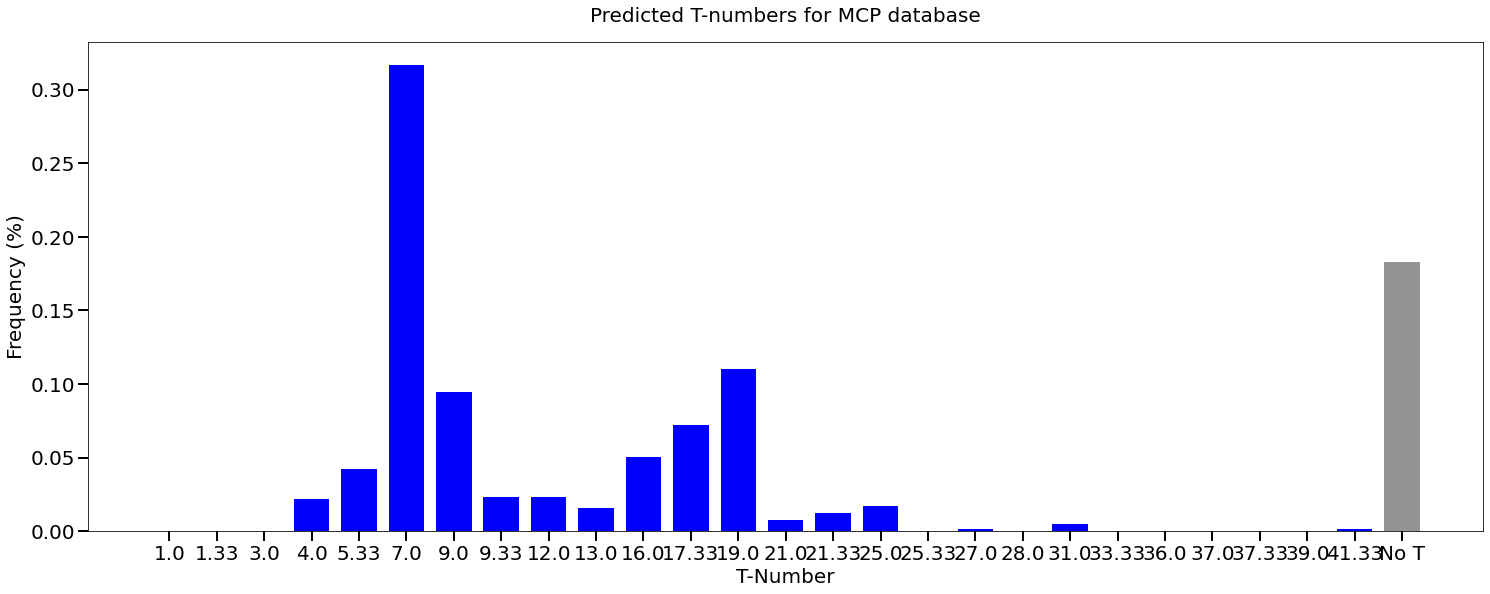

In [38]:
ind = np.arange(tPivot.shape[0])    # the x locations for the groups
width = 0.75 

# create a count of each T-number in the list with zero at the end
performance = []
for i in tps:
    performance.append(Counter(words)[i])
performance.append(Counter(words)[0])
performance=np.asarray(performance)/np.sum(performance)


# create a color map to make the 'No T' group gray
barColors = []
for p in ind:
    if (p==np.max(ind)):
        barColors.append('#929591')
    else:
        barColors.append('blue')
barColors = np.asarray(barColors)  

# plot the histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,9))
plt.bar(ind, performance, width, align='center',color=barColors)
plt.xticks(ind, tps3, fontsize=font2)
#plt.xticks(ind, objects2, fontsize=font2, rotation=45)
plt.yticks(fontsize=font2)
plt.ylabel('Frequency (%)', fontsize=font2)
plt.xlabel('T-Number', fontsize=font2)
ax.set_title('Predicted T-numbers for MCP database', fontsize=font2, pad=20)
ax.tick_params(length=10, width=2)
#plt.savefig("results/Fig4b_Predicted_T-numbers_for_MCP.png")
#plt.savefig("results/Fig4b-Predicted T-numbers for MCP.svg");

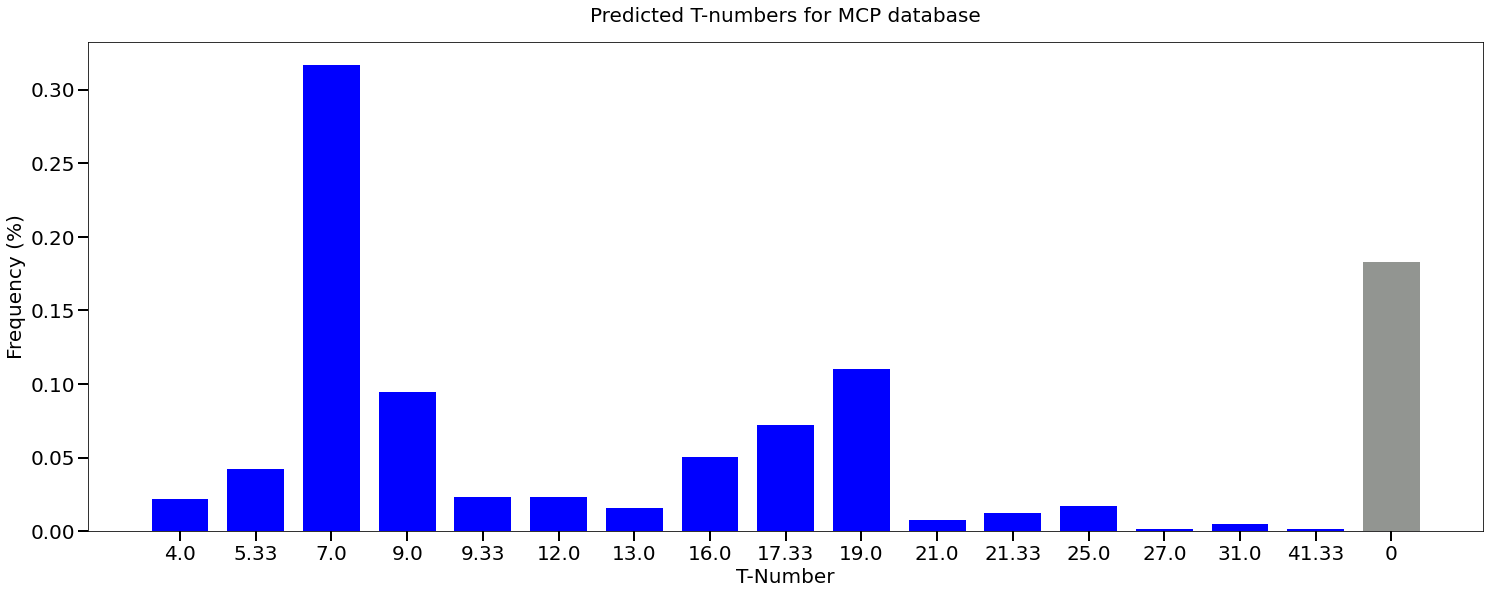

In [79]:
# plot it without the empty T buckets
ind = np.arange(tPivot.shape[0])    # the x locations for the groups
width = 0.75 

# create a count of each T-number in the list with zero at the end
TP_count = []
index_filter = []
for i in tps:
    if(Counter(words)[i]!=0):
        TP_count.append(Counter(words)[i])
        index_filter.append(i)
TP_count.append(Counter(words)[0])
TP_count=np.asarray(TP_count)/np.sum(TP_count)

TP_index = [i for i in tps if i in index_filter]
TP_index.append(0)
ind2 = np.arange(len(TP_index))    # the x locations for the groups

# create a color map to make the 'No T' group gray
barColors = []
for p in ind2:
    if (p==np.max(ind2)):
        barColors.append('#929591')
    else:
        barColors.append('blue')
barColors = np.asarray(barColors)  

# plot the histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,9))
plt.bar(ind2, TP_count, width, align='center',color=barColors)
plt.xticks(ind2, TP_index, fontsize=font2)
plt.yticks(fontsize=font2)
plt.ylabel('Frequency (%)', fontsize=font2)
plt.xlabel('T-Number', fontsize=font2)
ax.set_title('Predicted T-numbers for MCP database', fontsize=font2, pad=20)
ax.tick_params(length=10, width=2)
plt.savefig("results/Fig4b_Predicted_T-numbers_for_MCP.png")
plt.savefig("results/Fig4b-Predicted T-numbers for MCP.svg");

In [78]:
# list the T numbers with no predictions
TP_no_pred = [i for i in tps if i not in index_filter]
TP_no_pred

[1.0, 1.33, 3.0, 25.33, 28.0, 33.33, 36.0, 37.0, 37.33, 39.0]

In [39]:
tNF = []
for i in range(currentDataset.shape[0]):
    if currentDataset.iloc[i]["T_nearest_errMar"]==0:
        tNF.append(tNearestFloor(tps,currentDataset.iloc[i]["T_raw"]))
tNF = np.asarray(tNF)

words2 = tNF
print(Counter(words2).keys()) # equals to list(set(words))
print(Counter(words2).values()) # counts the elements' frequency

dict_keys([7.0, 5.33, 9.33, 3.0])
dict_values([51, 42, 22, 1])


In [41]:
print("MCP Database phages with no assigned T-number: ", tpivC[0])
print("Percent of total: ", np.round(tpivC[0]/n,2))


MCP Database phages with no assigned T-number:  116
Percent of total:  0.18


Text(0.5, 1.0, 'Nearest T-numbers (floor) for Unassigned phages (n=116)')

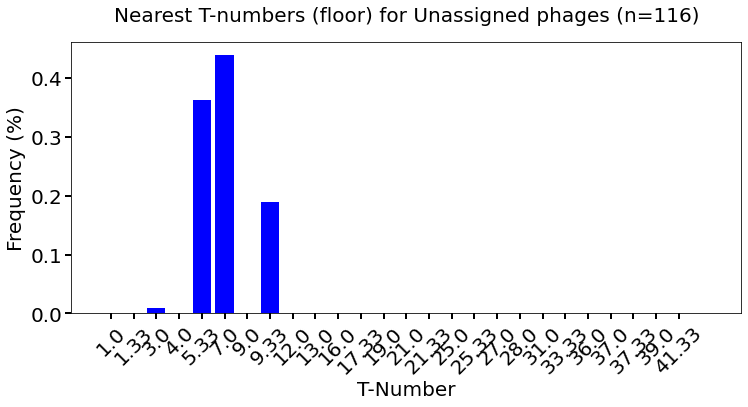

In [42]:
# create a count of each T-number in the list
performance2 = []
for i in tps:
    performance2.append(Counter(words2)[i])
performance2.append(0)
performance2=np.asarray(performance2)/np.sum(performance2)
#performance2

# plot the histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
plt.bar(y_pos, performance2, align='center', color=barColors)
plt.xticks(y_pos[:26], tps3[:26], fontsize=font2, rotation=45)
ax.tick_params(length=6, width=2)
plt.yticks(fontsize=font2)
plt.ylabel('Frequency (%)', fontsize=font2)
plt.xlabel('T-Number', fontsize=font2)
ax.set_title('Nearest T-numbers (floor) for Unassigned phages (n=' + str(tpivC[0])+')', fontsize=font2, pad=20)

#plt.savefig("results/Fig4bSI-Predicted T-numbers for Unassigned MCP.png")
#plt.savefig("results/Fig4bSI-Predicted T-numbers for Unassigned MCP.svg");

In [4]:
# save kernel state
# note that all csv_writer functions are commented out, since they cannot be pickled
import dill
dill.dump_session('Figure4_update.db')

In [4]:
## load kernel state
## rerun imports cells (#1 and #2) first
#import dill
#dill.load_session('Figure4_update.db')


In [10]:
errMar = .09
# import updated MCP database
phageData = pd.read_excel("data/PHAGE_TABLE4.xlsx")
# change any necessary column names using this command, with the arguments formatted as {"original_column_name" : "New_name"}
phageData = phageData.rename(columns={"COMPLETE_GENOME_BP": 'genome_length',"PROTEIN_BP": 'MCP_len',"ID": 'Virus_ID','TRANSLATION':'MCP_Sequence'})
# calculate T numbers 
ny = phageData.shape[0]
Y_T = []

for i in range(ny):
    Y_T.append(phageData.iloc[i]["Virus_ID"])
    Y_T.append(round(tNum(phageData.iloc[i]["genome_length"]/1000,0),4))
    Y_T.append(tNum(phageData.iloc[i]["genome_length"]/1000,1))
    Y_T.append(tNum(phageData.iloc[i]["genome_length"]/1000,2,errMar))
    Y_T.append(tdict2[tNum(phageData.iloc[i]["genome_length"]/1000,2,errMar)])
    
Y = np.asarray(Y_T)
Y = np.reshape(np.ravel(Y), (ny, 5));
Y = np.asarray(Y)

df_T = pd.DataFrame(Y)
df_T = df_T.rename(columns={0: 'Virus_ID', 1: 'T_raw', 2: 'T_nearest', 3: 'T_nearest_errMar', 4: 'T_nearest_errMar_code'})

df_T["T_raw"] = df_T["T_raw"].astype('float64')
df_T["T_nearest"] = df_T["T_nearest"].astype('float64')
df_T["T_nearest_errMar"] = df_T["T_nearest_errMar"].astype('float64')
df_T["T_nearest_errMar_code"] = df_T["T_nearest_errMar_code"].astype('int64')

# add T predictions to the phage data
currentDataset = phageData.merge(df_T, how='left', on='Virus_ID')
currentDataset[0:5]

,Virus_ID,DEFINITION,HR data,HR_T,COMPLETE_GENOME,genome_length,ORGANISM,NCBI_GENPEPT_PROTEIN_ID,PROTEIN_PRODUCT,MCP_len,MCP_Sequence,T_raw,T_nearest,T_nearest_errMar,T_nearest_errMar_code
0,0,Leuconostoc phage phiLNTR3,NaN,NaN,NC024378.1,28015,"Viruses; dsDNA viruses, no RNA stage; Caudovir...",YP_009044222.1,putative major capsid protein,317,MGIEFLSTSKAVELYAKLALETQGNTETFSRKWKDIVSERSEQAIT...,5.2455,5.33,5.33,4
1,1,Bacillus phage Curly,NaN,NaN,NC020479.1,49425,"Viruses; dsDNA viruses, no RNA stage; Caudovir...",YP_007517560.1,major capsid protein,296,MADIVLGQHPLLKKVFLDRRIKDFTASGFVADQLFTNISVDALAIK...,7.8613,7.00,0.00,47
2,2,Burkholderia phage ST79,NaN,NaN,NC021343.1,35430,"Viruses; dsDNA viruses, no RNA stage; Caudovir...",YP_008060494.1,major capsid protein,345,MNPITRRALTRYMDNIAKLNGVASVAEKFAVAPSVQQTLEKRIQES...,6.2010,7.00,0.00,47
3,3,Streptococcus phage Abc2,NaN,NaN,NC013645.1,34882,"Viruses; dsDNA viruses, no RNA stage; Caudovir...",YP_003347415.1,Phage major capsid protein # ACLAME 20,397,MKTSNELHDLWVAQGDKVENLNEKLNVAMLDDSVTAEELQKIKNER...,6.1325,5.33,0.00,47
4,5,Stenotrophomonas phage Smp131,NaN,NaN,NC023588.1,33525,"Viruses; dsDNA viruses, no RNA stage; Caudovir...",YP_009008364.1,phage major capsid protein precursor,337,MRTKTRRLFEGYTQQVATLNNVSGVANTFSVEPTVQQSLEARMQES...,5.9615,5.33,0.00,47


In [11]:
pd.DataFrame(currentDataset).to_csv(r'results/Fig4_currentDataset.csv', index=False)
